In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('../data/data_cleaned.csv', dtype={'route': str}, low_memory=False)

In [17]:
# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Define a mapping for merging the values within the 'incident' column
merge_mapping = {
    'Late Leaving Garage': 'Late',
    'Late': 'Late',
    'e': 'Late',
    'Late  ': 'Late',
    'Late Entering Service': 'Late',
    'Overhead - Pantograph': 'Overhead',
    'Overhead': 'Overhead',
    'Cleaning': 'Cleaning',
    'Cleaning - Unsanitary': 'Cleaning',
    'Cleaning - Disinfection': 'Cleaning'
}

# Apply the mapping to the 'incident' column
df['incident'] = df['incident'].replace(merge_mapping)

# 1. Descriptive Analysis

**A) Analyzing Delay Frequency and Duration by Route, Location, and Time**  

- **Delay Frequency and Duration by Route**  
The analysis of delay frequency and duration by route reveals that the 501 route has the highest number of incidents, with 35,885 occurrences, leading to an average delay of approximately 13.37 minutes per incident. This suggests that this route may be facing significant operational challenges that require attention. Similarly, the 504 route follows closely with 26,526 incidents and an average delay of 12.57 minutes. The data indicates that routes like 506 and 505 also experience notable delays, highlighting a pattern where certain routes consistently face more disruptions than others.

- **Delay Frequency and Duration by Location**  
When examining the delay frequency and duration by location, "Dundas West Station" emerges as the location with the highest incident count at 3,121, averaging a delay of about 9.12 minutes. This indicates that passengers at this station may frequently experience delays, warranting further investigation into potential causes such as high traffic or operational inefficiencies. Other locations like "Broadview Station" and "Spadina Station" also show significant incident counts, suggesting that these areas may need enhanced monitoring or maintenance efforts to reduce delays.

- **Delay Frequency and Duration by Day of the Week**  
The analysis of delay frequency by day of the week shows that Fridays have the highest number of incidents at 22,550, with an average delay of approximately 13.04 minutes. This trend suggests that the end of the workweek may see increased ridership or operational pressures, leading to more incidents. Interestingly, Sundays have the highest average delay duration at 16.11 minutes, despite having fewer incidents overall (16,363). This could indicate that when incidents do occur on Sundays, they tend to be more severe or disruptive or less manpower or operational capacity to manage such incidents.

In [18]:
# Delay Frequency by Route
delay_by_route = df.groupby('route')['delay'].agg(['count', 'mean', 'sum']).sort_values(by='count', ascending=False)
print("Delay Frequency and Duration by Route:")
print(delay_by_route)

# Delay Frequency by Location
delay_by_location = df.groupby('location')['delay'].agg(['count', 'mean', 'sum']).sort_values(by='count', ascending=False)
print("\nDelay Frequency and Duration by Location:")
print(delay_by_location)

# Delay Frequency by Day of the Week
delay_by_day = df.groupby('day')['delay'].agg(['count', 'mean', 'sum']).sort_values(by='count', ascending=False)
print("\nDelay Frequency and Duration by Day of the Week:")
print(delay_by_day)

Delay Frequency and Duration by Route:
                       count       mean       sum
route                                            
501                    35885  13.372607  479876.0
504                    26526  12.572721  333504.0
506                    19161  14.745681  282542.0
505                    16817  13.830885  232594.0
510                    11309  12.064374  136436.0
...                      ...        ...       ...
503 KINGSTON ROAD (60      1  33.000000      33.0
5014                       1   0.000000       0.0
501 QUEEN, ( 600           1  10.000000      10.0
5004                       1  10.000000      10.0
YU                         1   0.000000       0.0

[162 rows x 3 columns]

Delay Frequency and Duration by Location:
                                     count      mean      sum
location                                                     
dundas west station                   3121  9.124319  28477.0
broadview station                     2288  8.414336  1925

**B) Incident Types and Their Impact on Delays**    

- **Average Delay Duration by Incident Type**  
The analysis of average delay durations by incident type reveals significant variations in how different incidents affect service. For instance, Diversions lead to the longest average delays at approximately 58.20 minutes, indicating that when routes are diverted, it tends to cause substantial disruptions. Similarly, Overhead issues result in an average delay of about 36.83 minutes, suggesting that these incidents also significantly impact service times.  

- Other notable incidents include Held By (23.18 minutes) and Collision - TTC Involved (19.60 minutes), which also contribute to considerable delays. This highlights the need for focused strategies to manage these types of incidents effectively, as they can lead to longer wait times for passengers.

- **Incident Counts by Type**  
When examining the frequency of incidents, Mechanical issues are the most common, with a total of 46,155 occurrences. This indicates that mechanical problems are a frequent source of service disruptions and may require ongoing maintenance and preventive measures to reduce their occurrence.

In [19]:
# Average delay by incident type
avg_delay_by_incident = df.groupby('incident')['delay'].mean().sort_values(ascending=False)
print("\nAverage Delay Duration by Incident Type:")
print(avg_delay_by_incident)

# Count of incidents by type
incident_counts = df['incident'].value_counts()
print("\nIncident Counts by Type:")
print(incident_counts)


Average Delay Duration by Incident Type:
incident
Diversion                   58.204275
Overhead                    36.827532
Held By                     23.184488
Collision - TTC Involved    19.599076
Rail/Switches               17.794224
Investigation               17.148324
Emergency Services          15.351530
General Delay               14.167921
Security                    10.707938
Operations                   9.193326
Cleaning                     8.801361
Mechanical                   8.439952
Utilized Off Route           7.973744
Management                   7.117647
Late                         6.708726
Name: delay, dtype: float64

Incident Counts by Type:
incident
Mechanical                  46155
Operations                  19299
Held By                     13860
Investigation               12648
General Delay               11958
Late                         8171
Emergency Services           7712
Security                     6009
Cleaning                     5145
Diversion 

**C) Correlation Analysis**  

Performed correlation analysis to understand the relationships between delay duration, gap time, and the day of the week.

- **Delay and Gap Correlation (0.878747)**  
There is a strong positive correlation (close to 0.88) between delay duration and gap time. This suggests that as the delay duration increases, the gap time also tends to increase. This means that when streetcars experience longer delays, they are likely to have larger gaps in service, leading to longer wait times for passengers.

- **Delay and Day of Week Code Correlation (0.000138)**  
The correlation between delay duration and the day of the week code is very weak (close to 0). This indicates that there is no significant relationship between the day of the week and how long delays last. In simpler terms, delays do not seem to be influenced by whether it is a weekday or weekend, suggesting that operational issues causing delays are consistent throughout the week.

- **Gap and Day of Week Code Correlation (-0.003533)**  
Similar to above, there is a weak negative correlation between gap time and the day of the week code. This means that gaps in service do not significantly vary based on the day of the week either. Essentially, passengers can expect similar experiences regarding service gaps regardless of whether it’s Monday or Sunday.

                     delay       gap  day_of_week_code
delay             1.000000  0.878747          0.000138
gap               0.878747  1.000000         -0.003533
day_of_week_code  0.000138 -0.003533          1.000000


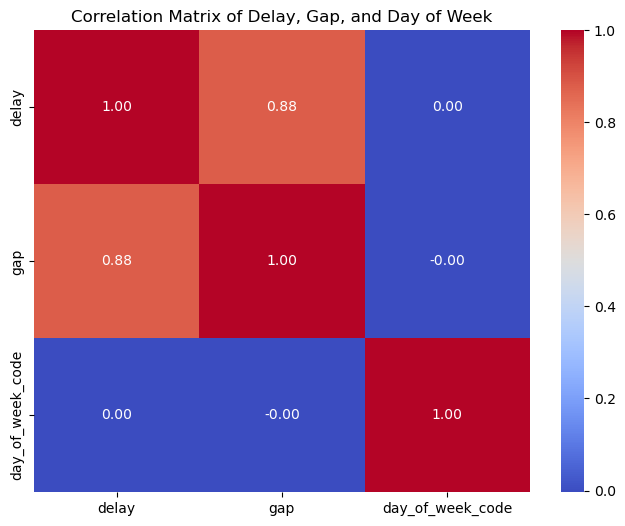

In [20]:
# Create additional time-related columns
df['hour'] = df['dt'].dt.hour
df['day_of_week'] = df['dt'].dt.day_name()

# Convert 'day_of_week' to categorical codes for correlation analysis (Monday: 0, Tuesday: 1, Wednesday: 2, Thursday: 3, Friday: 4, Saturday: 5, Sunday: 6)
df['day_of_week_code'] = df['day_of_week'].astype('category').cat.codes

# Select only relevant numeric columns for correlation
correlation_data = df[['delay', 'gap', 'day_of_week_code']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

# Visualizing the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Delay, Gap, and Day of Week')
plt.show()

# 2. Regressions Analysis

Preparing and developing regression models, and evaluating their performance to understand:

- What factors contribute most significantly to the duration of delays?
- How well can we predict delay durations based on these factors?
- Are there any specific incident types, routes, or times of day that are strong predictors of longer delays?

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Select relevant features for the model
# Including delay as target variable and gap, hour, day_of_week_code as predictors
X = df[['gap', 'hour', 'day_of_week_code']]
y = df['delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Detailed summary using statsmodels for insights on predictors
X_with_constant = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_constant).fit()
print(model_sm.summary())

Mean Squared Error: 112.08240181902953
R^2 Score: 0.8838505995520898
                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.627e+05
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:22:37   Log-Likelihood:            -5.9925e+05
No. Observations:              143968   AIC:                         1.199e+06
Df Residuals:                  143964   BIC:                         1.199e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

**Analysis Findings and Summary**  

The results of the regression analysis has offered some valuable insights into the factors influencing delay durations in the TTC streetcar system.  

**1. What factors contribute most significantly to the duration of delays?**  

The regression results indicate that gap time is the most significant predictor of delay duration, with a coefficient of approximately 0.82. This means that for every additional minute of gap time, the delay duration increases by about 0.82 minutes. Additionally, both hour of the day and day of the week also contribute to delays, albeit to a lesser extent.

**2. How well can we predict delay durations based on these factors?**  

The model's R-squared score is approximately 0.88, indicating that about 88% of the variability in delay durations can be explained by the model's predictors. The model demonstrates a strong ability to predict delay durations based on gap time, hour, and day of the week. The Mean Squared Error (MSE) is around 112.08, which provides a measure of prediction accuracy. The relatively high R-squared value suggests that the model is effective in capturing key patterns in the data.

**3. Are there any specific incident types, routes, or times of day that are strong predictors of longer delays?**  

While the regression analysis primarily focused on gap time, hour, and day of the week, it did not include incident types or routes directly in this specific model. However, it indicates that time-related factors (hour and day) do have some influence on delays.  

Although incident types and routes were not explicitly analyzed in this regression model, they could be incorporated into future models to further explore their impact on delays.